In [1]:
# imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
pd.set_option('display.max_rows', 20)

# Idée d'application

# Extract & Load

In [3]:
ls -lh ./data

total 12G
-rw-r--r-- 1 mijka mijka 5,6G 22 avril 10:03 en.openfoodfacts.org.products.csv
-rw-r--r-- 1 mijka mijka 5,7G 22 avril 10:01 fr.openfoodfacts.org.products.csv
-rw-r--r-- 1 mijka mijka 809M 21 avril  2017 fr.openfoodfacts.org.products_old.csv


In [4]:
csv_path = './data/fr.openfoodfacts.org.products.csv'
csv_path_old = './data/fr.openfoodfacts.org.products_old.csv'
#df = pd.read_csv('./data/fr.openfoodfacts.org.products.csv', sep='delimiter', header=None)
#df = pd.read_csv(csv_path, on_bad_lines='skip')
df = pd.read_csv(csv_path, sep='\t', header='infer', on_bad_lines='skip', low_memory=False)
#df_old = pd.read_csv(csv_path_old, sep='\t', header='infer', on_bad_lines='skip', low_memory=False)

# Explore

## Functions

In [5]:
def get_df_columns_na(df):
    counts = df.isna().sum()
    percentages = round(df.isna().mean() * 100, 1)
    null_values = pd.concat([counts, percentages], axis = 1, keys = ["count", "null_percent"])
    null_values['columns'] = null_values.index
    null_values = null_values[['columns', 'count', 'null_percent']]
    return null_values

In [6]:
def plot_df_xy(df, x_val, y_val, height_val = 20, width_val = 13):
    sns.catplot(data=df, x= x_val, y= y_val, kind="bar", height=height_val, aspect=width_val/height_val)
    sns.set(rc={'figure.figsize':(width_val,height_val)})
    plt.xticks(rotation=70)
    plt.tight_layout()

## Cardinality 

In [7]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-fr.openfoodfacts.org/produit/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,created_t,last_modified_t,cities,allergens_fr,serving_quantity,no_nutriments,additives_n,additives,nutriscore_score,nova_group,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.282517e+06,2.282517e+06,0.0,0.0,5.308960e+05,0.0,758512.000000,0.0,779842.000000,682466.000000,...,12138.000000,779846.000000,6.000000,5.0000,2.000000,74.000000,1712.000000,41.000000,77.000000,45.000000
mean,1.570776e+09,1.610378e+09,NaN,NaN,2.092906e+16,NaN,2.011496,NaN,9.090063,3.381807,...,609.468917,9.090114,16.333333,41.3400,4550.737500,2.815816,0.068921,3.352927,1.980488,0.023650
std,5.675199e+07,3.345334e+07,NaN,NaN,1.524940e+19,NaN,2.878295,NaN,8.848157,0.992255,...,6015.010480,8.848171,10.819735,20.9685,6433.628726,17.273558,1.826776,1.687217,12.002286,0.083955
min,1.328021e+09,1.353582e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,-15.000000,1.000000,...,0.049000,-15.000000,-3.000000,14.0000,1.475000,0.000000,0.000000,0.400000,0.001350,0.000800
25%,1.532097e+09,1.587629e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,1.000000,3.000000,...,103.600000,1.000000,13.000000,30.0000,2276.106250,0.040500,0.000008,2.400000,0.009400,0.007000
50%,1.581448e+09,1.617569e+09,NaN,NaN,5.500000e+01,NaN,1.000000,NaN,10.000000,4.000000,...,323.400000,10.000000,22.000000,44.0000,4550.737500,0.071800,0.000023,3.600000,0.025000,0.009500
75%,1.617540e+09,1.641786e+09,NaN,NaN,1.140000e+02,NaN,3.000000,NaN,16.000000,4.000000,...,611.000000,16.000000,22.000000,48.7000,6825.368750,0.119250,0.000096,4.000000,0.051000,0.015000
max,1.650593e+09,1.650593e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,40.000000,4.000000,...,656298.600000,40.000000,25.000000,70.0000,9100.000000,136.000000,54.000000,8.000000,75.000000,0.572000


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282517 entries, 0 to 2282516
Data columns (total 186 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    code                                                   object 
 1    url                                                    object 
 2    creator                                                object 
 3    created_t                                              int64  
 4    created_datetime                                       object 
 5    last_modified_t                                        int64  
 6    last_modified_datetime                                 object 
 7    product_name                                           object 
 8    abbreviated_product_name                               object 
 9    generic_name                                           object 
 10   quantity                                            

## Missing Data 

In [10]:
data_na = get_df_columns_na(df)

In [11]:
pd.set_option('display.max_rows', None)
data_na

,columns,count,null_percent
code,code,0,0.0
url,url,0,0.0
creator,creator,4,0.0
created_t,created_t,0,0.0
created_datetime,created_datetime,0,0.0
last_modified_t,last_modified_t,0,0.0
last_modified_datetime,last_modified_datetime,0,0.0
product_name,product_name,86006,3.8
abbreviated_product_name,abbreviated_product_name,2274653,99.7
generic_name,generic_name,2154980,94.4


In [12]:
chol_row = data_na.loc[data_na['columns'][['code','phylloquinone_100g', 'inositol_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']]]
chol_row

,columns,count,null_percent
code,code,0,0.0
phylloquinone_100g,phylloquinone_100g,2280805,99.9
inositol_100g,inositol_100g,2282440,100.0
fruits-vegetables-nuts-estimate-from-ingredients_100g,fruits-vegetables-nuts-estimate-from-ingredien...,1525337,66.8


In [13]:
data_na_sort = data_na.sort_values(by='null_percent',ascending=False)
data_na_sort

,columns,count,null_percent
melissic-acid_100g,melissic-acid_100g,2282468,100.0
energy-from-fat_100g,energy-from-fat_100g,2281532,100.0
nervonic-acid_100g,nervonic-acid_100g,2282494,100.0
erucic-acid_100g,erucic-acid_100g,2282506,100.0
mead-acid_100g,mead-acid_100g,2282485,100.0
gondoic-acid_100g,gondoic-acid_100g,2282413,100.0
elaidic-acid_100g,elaidic-acid_100g,2282512,100.0
oleic-acid_100g,oleic-acid_100g,2282414,100.0
omega-9-fat_100g,omega-9-fat_100g,2282381,100.0
dihomo-gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,2282491,100.0


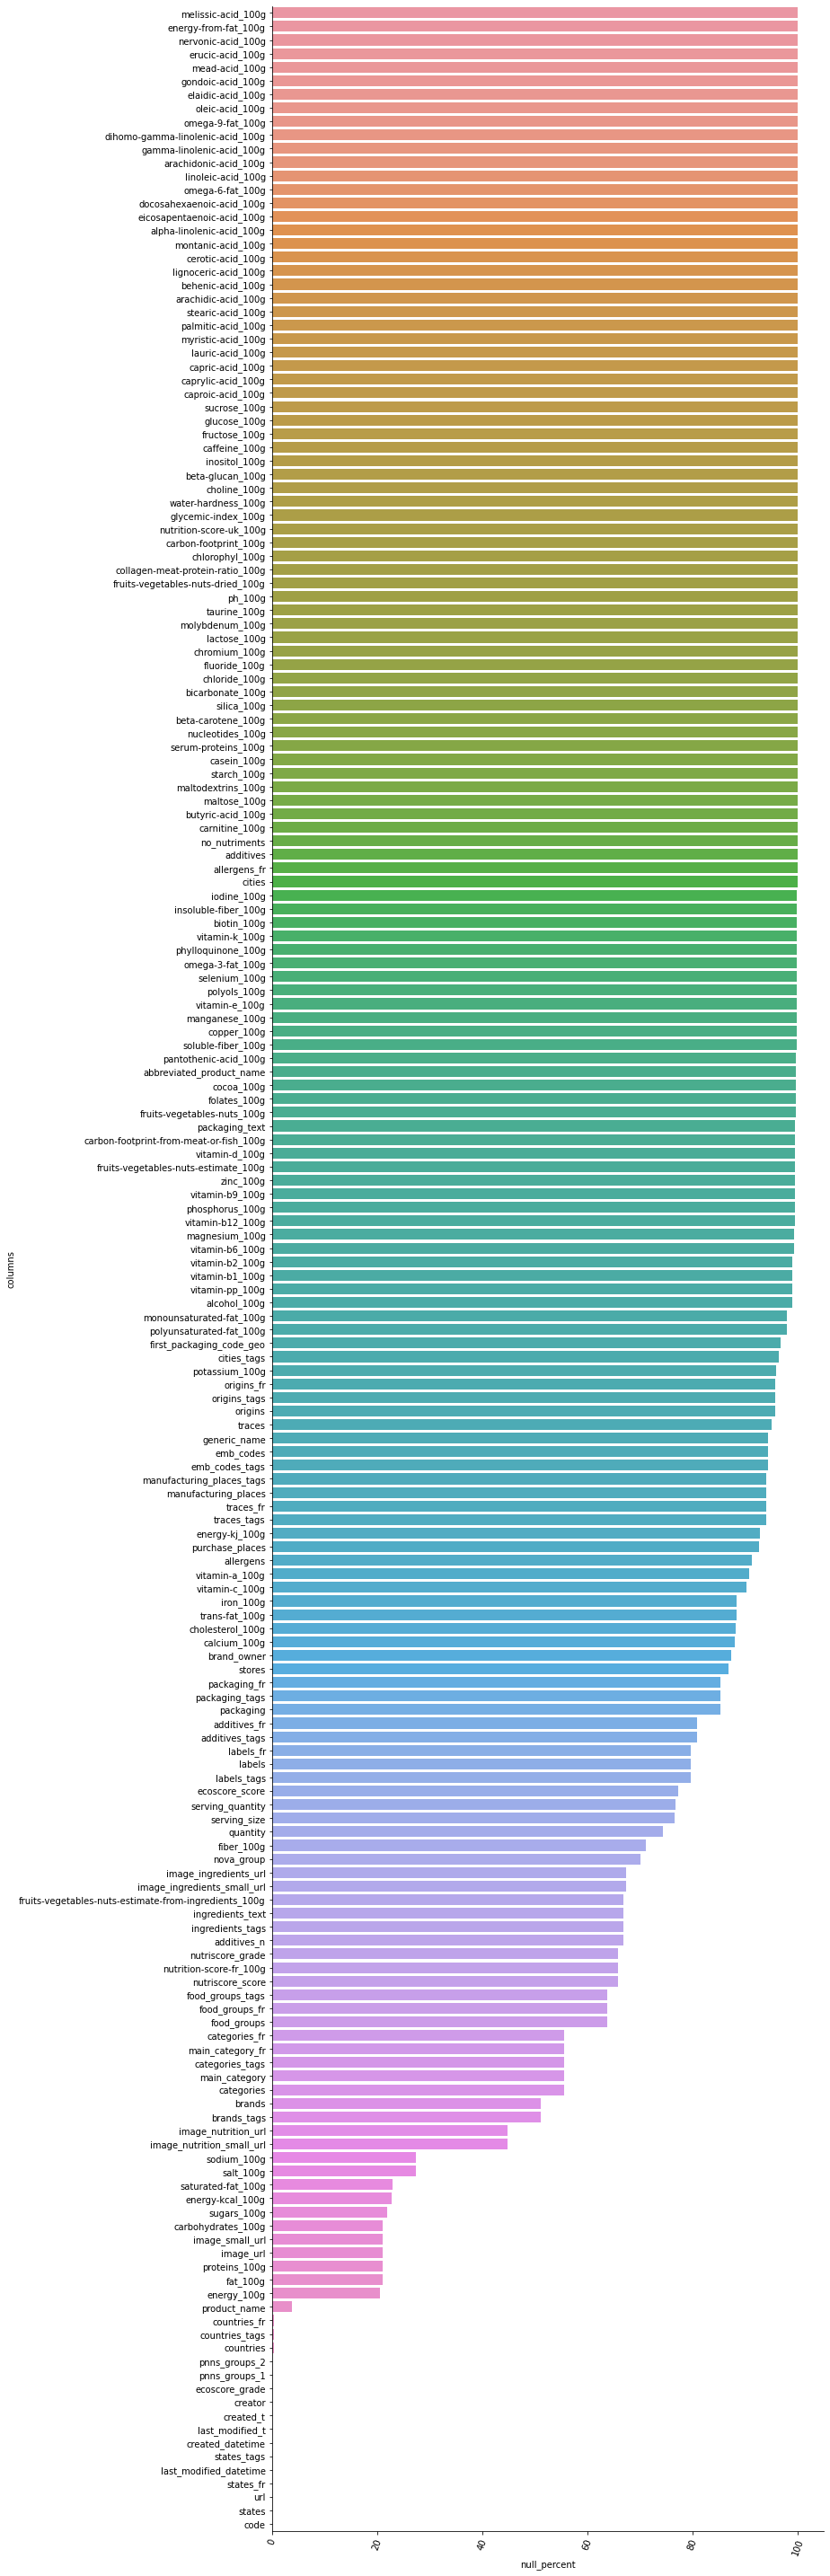

In [14]:
plot_df_xy(data_na_sort.reset_index(), 'null_percent', 'columns', 40)

In [15]:
data_na_sort

,columns,count,null_percent
melissic-acid_100g,melissic-acid_100g,2282468,100.0
energy-from-fat_100g,energy-from-fat_100g,2281532,100.0
nervonic-acid_100g,nervonic-acid_100g,2282494,100.0
erucic-acid_100g,erucic-acid_100g,2282506,100.0
mead-acid_100g,mead-acid_100g,2282485,100.0
gondoic-acid_100g,gondoic-acid_100g,2282413,100.0
elaidic-acid_100g,elaidic-acid_100g,2282512,100.0
oleic-acid_100g,oleic-acid_100g,2282414,100.0
omega-9-fat_100g,omega-9-fat_100g,2282381,100.0
dihomo-gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,2282491,100.0


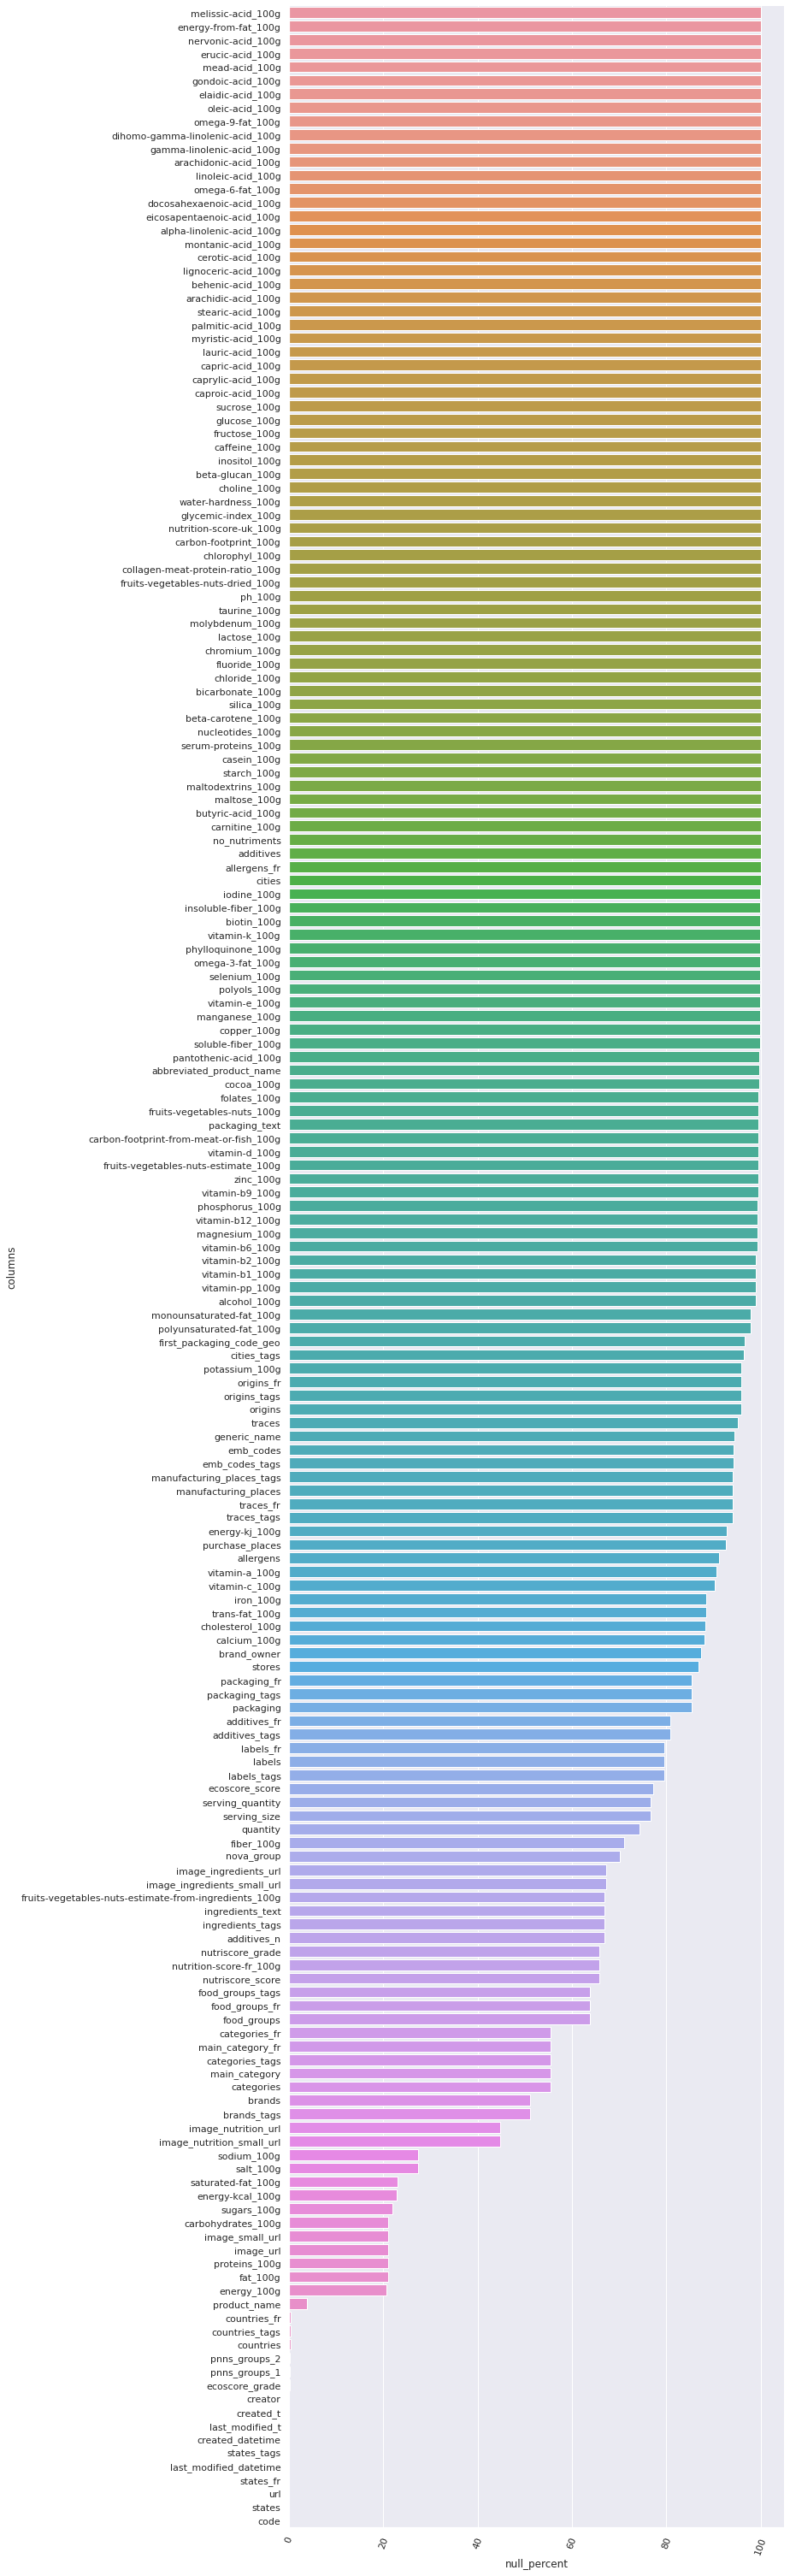

In [16]:
plot_df_xy(data_na_sort.reset_index(), 'null_percent', 'columns', 42)

In [17]:
#nan_values = df.isnull().sum()
#nan_percent = nan_values /df.shape[0]*100


In [18]:
#nan_values

In [19]:
#plot_df_xy(data=nan_values, nan_percent, nan_percent.index)

In [20]:
#plt.figure(figsize=(30, 8))
#sns.distplot(nan_values, kde=False, bins=np.int(df.shape[0]/10000))


In [21]:
# find columns with 100% missing values
top_df_high_miss = data_na.loc[data_na["null_percent"] >= 65].index

# drop columns with 100% missing values
top_df = df.drop(top_df_high_miss, axis = 1)
top_df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'countries', 'countries_tags', 'countries_fr', 'pnns_groups_1',
       'pnns_groups_2', 'food_groups', 'food_groups_tags', 'food_groups_fr',
       'states', 'states_tags', 'states_fr', 'ecoscore_grade', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [22]:
#top_df.sort_values(by='null_percent',ascending=False)
#top_df

In [23]:
get_df_columns_na(top_df).sort_values(by='null_percent',ascending=False)

,columns,count,null_percent
food_groups_fr,food_groups_fr,1455381,63.8
food_groups,food_groups,1455381,63.8
food_groups_tags,food_groups_tags,1455381,63.8
main_category_fr,main_category_fr,1266614,55.5
main_category,main_category,1266614,55.5
categories,categories,1266596,55.5
categories_tags,categories_tags,1266614,55.5
categories_fr,categories_fr,1266614,55.5
brands,brands,1166217,51.1
brands_tags,brands_tags,1166294,51.1


In [24]:
top_nan_values = top_df.isnull().sum()
top_nan_percent = top_nan_values /top_df.shape[0]*100

### use categories

#### identify categories

In [25]:
#print(df.apply(lambda col: col.unique()))

In [26]:
top_df['pnns_groups_1'].nunique()

12

In [27]:
top_df['pnns_groups_2'].nunique()

42

In [28]:
top_df['main_category_fr'].nunique()

35541

In [29]:
top_df['pnns_groups_1'].head(50)

0                   unknown
1                   unknown
2                   unknown
3                   unknown
4                   unknown
5                   unknown
6                   unknown
7                   unknown
8            Fat and sauces
9                   unknown
10                  unknown
11                  unknown
12                  unknown
13                  unknown
14                  unknown
15                  unknown
16                  unknown
17                  unknown
18          Composite foods
19                  unknown
20                  unknown
21                  unknown
22                  unknown
23                  unknown
24                  unknown
25                  unknown
26                  unknown
27            Sugary snacks
28                  unknown
29                  unknown
30                  unknown
31                  unknown
32                  unknown
33                  unknown
34                  unknown
35                  

In [30]:
top_df['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'Alcoholic beverages', nan, 'sugary-snacks'], dtype=object)

In [31]:
top_df['pnns_groups_2'].unique()

array(['unknown', 'Dressings and sauces', 'One-dish meals',
       'Biscuits and cakes', 'Fruits', 'Meat', 'Sweets',
       'Sweetened beverages', 'Cheese', 'Bread', 'Fish and seafood',
       'Salty and fatty products', 'Fruit juices', 'Dried fruits',
       'Vegetables', 'Fats', 'Dairy desserts', 'Milk and yogurt',
       'Pastries', 'Pizza pies and quiches', 'Legumes',
       'Unsweetened beverages', 'Nuts', 'Cereals', 'Alcoholic beverages',
       'Breakfast cereals', 'Appetizers', 'Processed meat',
       'Chocolate products', 'Eggs', 'Plant-based milk substitutes',
       'Sandwiches', 'Ice cream', 'Soups',
       'Teas and herbal teas and coffees', 'Potatoes',
       'Artificially sweetened beverages', 'Waters and flavored waters',
       nan, 'Offals', 'Fruit nectars', 'pastries',
       'Pizza pies and quiche'], dtype=object)

In [32]:
top_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282517 entries, 0 to 2282516
Data columns (total 40 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   code                       object 
 1   url                        object 
 2   creator                    object 
 3   created_t                  int64  
 4   created_datetime           object 
 5   last_modified_t            int64  
 6   last_modified_datetime     object 
 7   product_name               object 
 8   brands                     object 
 9   brands_tags                object 
 10  categories                 object 
 11  categories_tags            object 
 12  categories_fr              object 
 13  countries                  object 
 14  countries_tags             object 
 15  countries_fr               object 
 16  pnns_groups_1              object 
 17  pnns_groups_2              object 
 18  food_groups                object 
 19  food_groups_tags           object 
 20  fo

In [33]:
top_df.shape

(2282517, 40)

In [34]:
top_df['pnns_groups_1'].value_counts()

unknown                    1461312
Sugary snacks               169932
Fish Meat Eggs              115729
Milk and dairy products     102703
Cereals and potatoes         95597
Fat and sauces               79141
Beverages                    75157
Fruits and vegetables        62980
Composite foods              60640
Salty snacks                 37917
Alcoholic beverages          20222
sugary-snacks                    2
Name: pnns_groups_1, dtype: int64

In [35]:
top_df['pnns_groups_2'].value_counts()

unknown                             1461312
Sweets                                76927
Biscuits and cakes                    69106
Dressings and sauces                  55144
Cheese                                51147
One-dish meals                        46481
Cereals                               45639
Processed meat                        43191
Meat                                  35899
Milk and yogurt                       35794
Vegetables                            34093
Fish and seafood                      31028
Bread                                 25133
Sweetened beverages                   24652
Fats                                  23997
Alcoholic beverages                   20224
Fruits                                19007
Chocolate products                    16556
Salty and fatty products              15645
Appetizers                            13323
Unsweetened beverages                 12344
Breakfast cereals                     11010
Fruit juices                    

<AxesSubplot:xlabel='Count', ylabel='pnns_groups_1'>

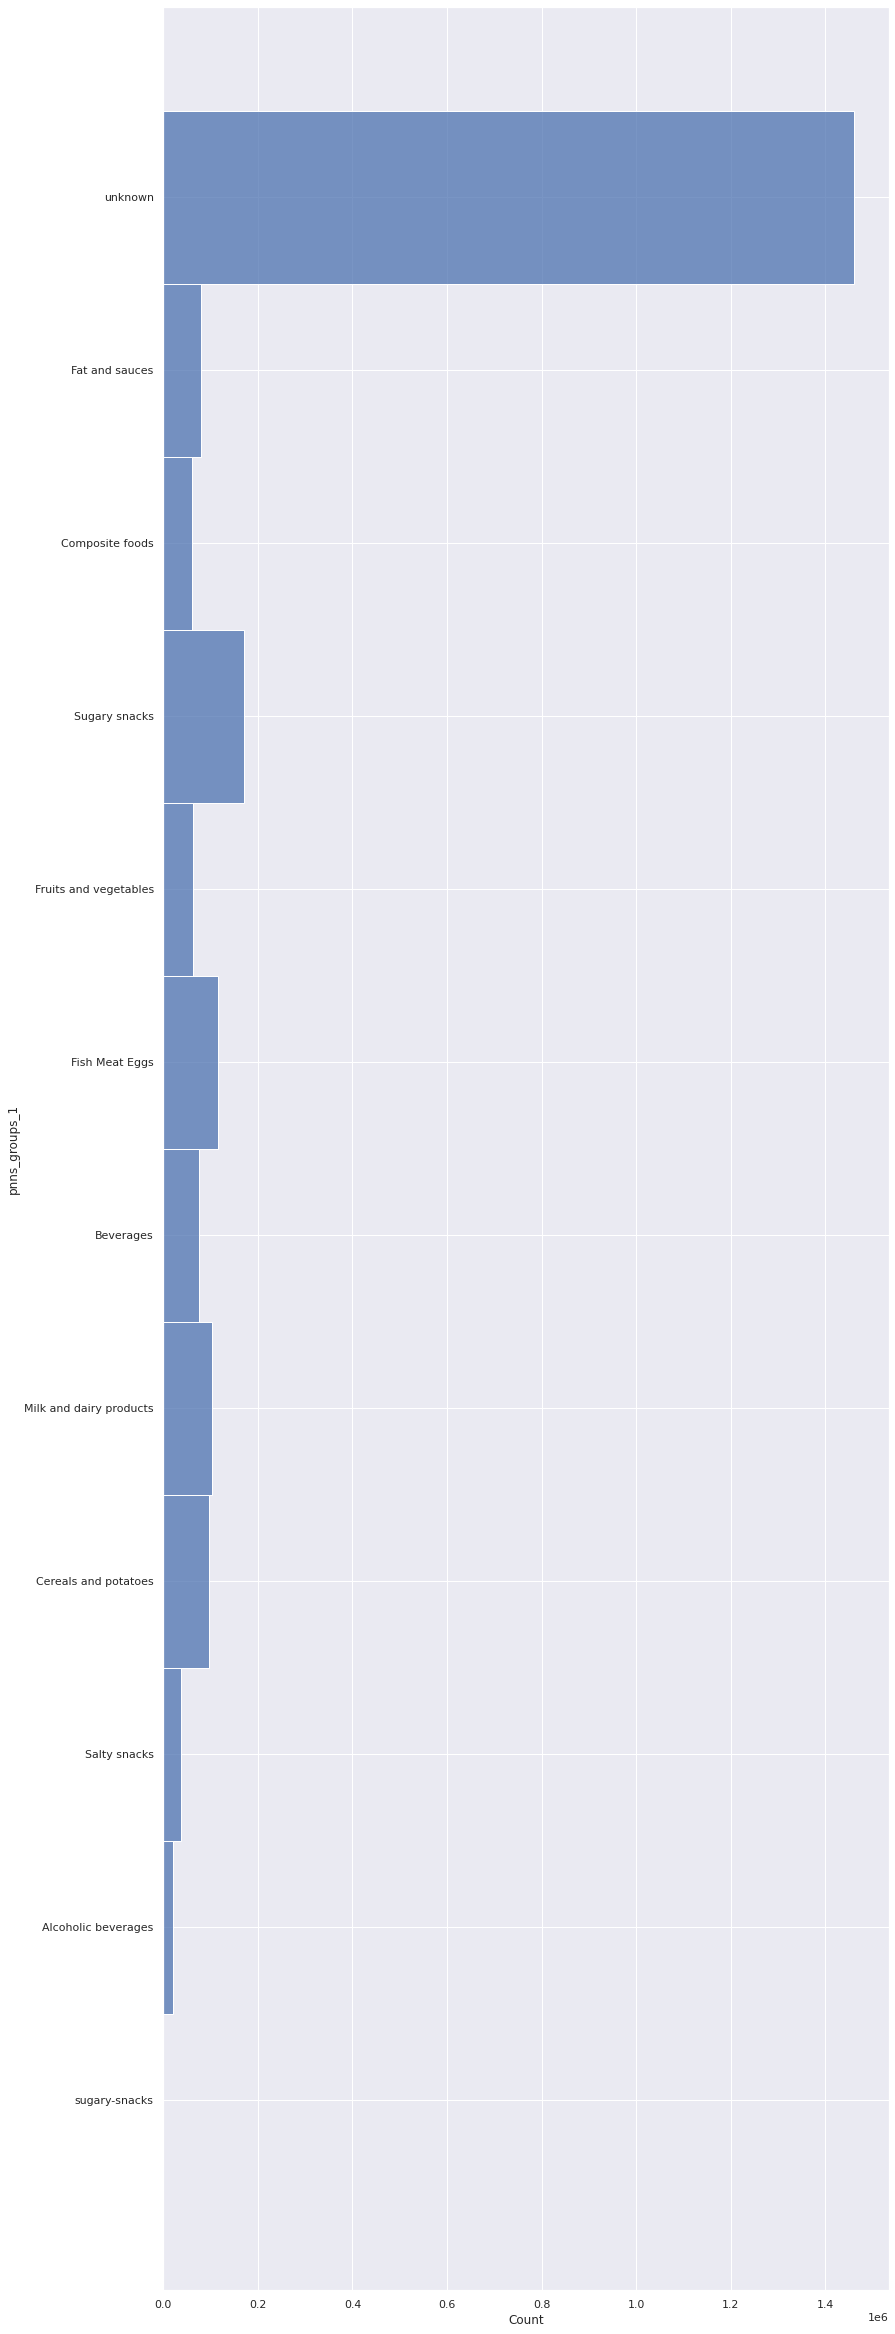

In [36]:
sns.histplot(data=top_df, y="pnns_groups_1")

#### encode categories

In [37]:
#from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(sparse = False) #instanciate encoder
#ohe.fit(top_df[['pnns_groups_1']]) # fit encoder
#pnn1_encoded = ohe.transform(top_df[['pnns_groups_1']]) # encode pnn1
#